# Exercise

 - Import data on emotion
 - Train a CNN to classify by emotion (Angry, Disgust, Fear, Happy...)
 - Use Data augmentaion techinques to improve you accuracy
 - Compare your results with DeepFace Library https://pypi.org/project/deepface/

In [272]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [273]:
!unzip /content/drive/MyDrive/Ironhack/CNN/emotions-20231104T114718Z-001.zip

Archive:  /content/drive/MyDrive/Ironhack/CNN/emotions-20231104T114718Z-001.zip
replace emotions/Disgust/image 106.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tabulate import tabulate

import cv2 as cv
import pathlib
from PIL import Image

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [275]:
url = '/content/emotions/'
data = pathlib.Path(url)
paths = {
    "Angry": list(data.glob('Angry/*.png')),
    "Disgust": list(data.glob('Disgust/*.png')),
    "Fear": list(data.glob('Fear/*.png')),
    "Happy" : list(data.glob('Happy/*.png')),
    "Neutral" : list(data.glob('Neutral/*.png')),
    "Sad" : list(data.glob('Sad/*.png')),
    "Surprise" : list(data.glob('Surprise/*.png'))
}

labels = {
    "Angry" : 0,
    "Disgust":1,
    "Fear":2,
    "Happy":3,
    "Neutral":4,
    "Sad":5,
    "Surprise":6
}

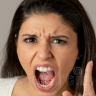

In [276]:
Image.open(str(paths["Angry"][0]))

In [277]:
X=[]
y=[]

for name, images in paths.items():
    for image in images:
        try:
            print(name)
            image = str(image).strip()
            img = cv.imread(image)
            img_resize = cv.resize(img,(200,200))
            X.append(img_resize)
            y.append(labels[name])

        except:
            print('Except')

X = np.array(X)
y = np.array(y)
X.shape

Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Angry
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Disgust
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Fear
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Happy
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral


(221, 200, 200, 3)

In [278]:
for label in y:
  print(label)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6


Text(0, 0.5, 'Count')

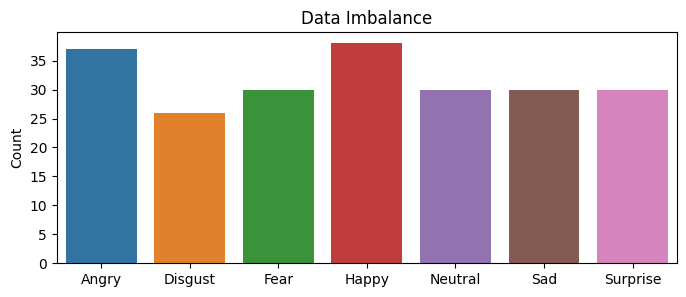

In [279]:
plt.figure(figsize=(8, 3))
g = sns.countplot(x = y)
g.set_xticks(range(len(list(labels.keys()))))
g.set_xticklabels(list(labels.keys()))
plt.title('Data Imbalance')
# plt.xlabel('emotions')
plt.ylabel('Count')

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(154, 200, 200, 3)
(67, 200, 200, 3)
(154,)


In [281]:
# codificar a estilo one-hot las salidas

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

num_classes = y_test.shape[1]
y_test.shape[1]

7

In [282]:
# definimos una CNN simple
def baseline_model():
  # creamos el modelo
  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same', input_shape=(200, 200, 3), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [283]:
# construimos el modelo
model = baseline_model()
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_167 (Conv2D)         (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_130 (MaxPool  (None, 100, 100, 32)      0         
 ing2D)                                                          
                                                                 
 dropout_122 (Dropout)       (None, 100, 100, 32)      0         
                                                                 
 conv2d_168 (Conv2D)         (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_131 (MaxPool  (None, 50, 50, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_123 (Dropout)       (None, 50, 50, 64)      

In [284]:
# entrenamos el modelo
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=50)

Epoch 1/30
4/4 [==============================] - 3s 194ms/step - loss: 477.3510 - accuracy: 0.1429 - val_loss: 10.4847 - val_accuracy: 0.1343
Epoch 2/30
4/4 [==============================] - 0s 120ms/step - loss: 19.3791 - accuracy: 0.1494 - val_loss: 2.0174 - val_accuracy: 0.0746
Epoch 3/30
4/4 [==============================] - 0s 121ms/step - loss: 2.1275 - accuracy: 0.1104 - val_loss: 1.9469 - val_accuracy: 0.1343
Epoch 4/30
4/4 [==============================] - 0s 118ms/step - loss: 1.9380 - accuracy: 0.2078 - val_loss: 1.9444 - val_accuracy: 0.1045
Epoch 5/30
4/4 [==============================] - 0s 123ms/step - loss: 1.9490 - accuracy: 0.1558 - val_loss: 1.9429 - val_accuracy: 0.1493
Epoch 6/30
4/4 [==============================] - 0s 123ms/step - loss: 1.9356 - accuracy: 0.1948 - val_loss: 1.9427 - val_accuracy: 0.1791
Epoch 7/30
4/4 [==============================] - 0s 123ms/step - loss: 1.9185 - accuracy: 0.2597 - val_loss: 1.9477 - val_accuracy: 0.1642
Epoch 8/30
4/4 [

In [285]:
history_dict = history.history

In [286]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

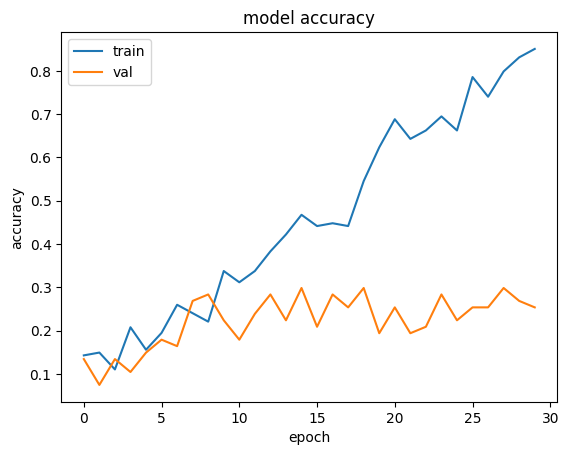

In [287]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [288]:
#evaluate the keras model
_, accuracy_tr = model.evaluate(X_train, y_train)
_, accuracy_ts= model.evaluate(X_test, y_test)
print('Accuracy train: %.2f' % (accuracy_tr*100))
print('Accuracy test: %.2f' % (accuracy_ts*100))

3/3 [==============================] - 0s 15ms/step - loss: 2.7347 - accuracy: 0.2537
Accuracy train: 92.21
Accuracy test: 25.37


### Data Augmentation

In [289]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    # rescale=1./255,
    rotation_range = 25,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    vertical_flip = True,
    horizontal_flip = True,
    )

# img_gen.fit(X_train)
augmented_data_generator  = img_gen.flow(X_train, y_train, batch_size=300)
batch = augmented_data_generator.next()

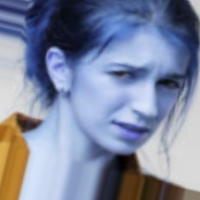

In [290]:
imagen = Image.fromarray(np.uint8(batch[0][153]))
imagen

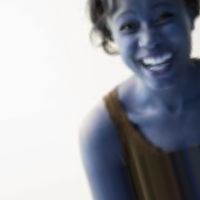

In [291]:
imagen = Image.fromarray(np.uint8(batch[0][72]))
imagen

In [292]:
X_train_aug = np.concatenate((X_train, batch[0]), axis=0)
y_train_aug = np.concatenate((y_train, batch[1]), axis=0)

In [293]:
X_train_aug.shape

(308, 200, 200, 3)

In [294]:
y_train_aug.shape

(308, 7)

In [295]:
# definimos una CNN simple
def baseline_model():
  # creamos el modelo
  model = Sequential()
  model.add(Conv2D(32, (5, 5), padding='same', input_shape=(200, 200, 3), activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Dropout(0.2))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  # Compilamos el modelo
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [296]:
# construimos el modelo
model = baseline_model()
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_171 (Conv2D)         (None, 200, 200, 32)      2432      
                                                                 
 max_pooling2d_134 (MaxPool  (None, 100, 100, 32)      0         
 ing2D)                                                          
                                                                 
 dropout_126 (Dropout)       (None, 100, 100, 32)      0         
                                                                 
 conv2d_172 (Conv2D)         (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_135 (MaxPool  (None, 50, 50, 64)        0         
 ing2D)                                                          
                                                                 
 dropout_127 (Dropout)       (None, 50, 50, 64)      

In [297]:
# entrenamos el modelo
history2=model.fit(X_train_aug, y_train_aug, validation_data=(X_test, y_test), epochs=30, batch_size=50)

Epoch 1/30
7/7 [==============================] - 4s 199ms/step - loss: 325.2596 - accuracy: 0.1591 - val_loss: 1.9446 - val_accuracy: 0.1194
Epoch 2/30
7/7 [==============================] - 1s 133ms/step - loss: 2.2169 - accuracy: 0.1299 - val_loss: 1.9460 - val_accuracy: 0.1343
Epoch 3/30
7/7 [==============================] - 1s 127ms/step - loss: 1.9492 - accuracy: 0.1526 - val_loss: 1.9423 - val_accuracy: 0.1493
Epoch 4/30
7/7 [==============================] - 1s 134ms/step - loss: 1.9651 - accuracy: 0.1656 - val_loss: 1.9427 - val_accuracy: 0.2090
Epoch 5/30
7/7 [==============================] - 1s 134ms/step - loss: 1.9449 - accuracy: 0.1396 - val_loss: 1.9470 - val_accuracy: 0.1194
Epoch 6/30
7/7 [==============================] - 1s 136ms/step - loss: 1.9421 - accuracy: 0.1558 - val_loss: 1.9467 - val_accuracy: 0.1343
Epoch 7/30
7/7 [==============================] - 1s 136ms/step - loss: 1.9145 - accuracy: 0.2175 - val_loss: 1.9367 - val_accuracy: 0.2090
Epoch 8/30
7/7 [==

In [298]:
#evaluate the keras model
_, accuracy_tr = model.evaluate(X_train_aug, y_train_aug)
_, accuracy_ts= model.evaluate(X_test, y_test)
print('Accuracy train: %.2f' % (accuracy_tr*100))
print('Accuracy test: %.2f' % (accuracy_ts*100))

3/3 [==============================] - 0s 12ms/step - loss: 3.7398 - accuracy: 0.3284
Accuracy train: 99.35
Accuracy test: 32.84


In [299]:
history_dict = history2.history

In [300]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

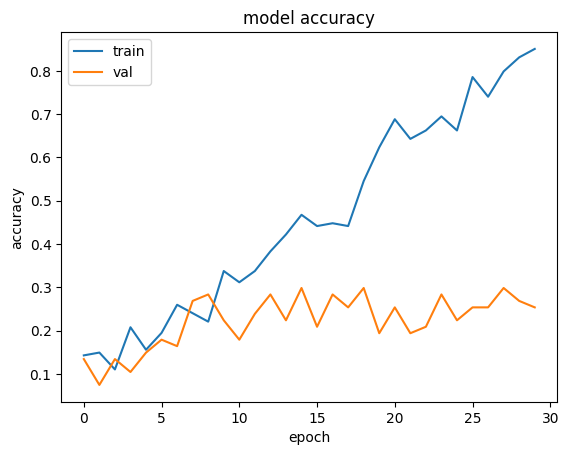

In [301]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Deepface


In [302]:
!pip install deepface

In [308]:
from deepface import DeepFace

In [309]:
objs = DeepFace.analyze(img_path = '/content/emotions/Angry/image 72.png',
        actions = ['age', 'gender', 'race', 'emotion'])

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  8.03it/s]


In [310]:
objs

[{'age': 27,
  'region': {'x': 16, 'y': 19, 'w': 64, 'h': 64},
  'gender': {'Woman': 0.010792600369313732, 'Man': 99.98921155929565},
  'dominant_gender': 'Man',
  'race': {'asian': 7.705330981437458e-05,
   'indian': 0.002695005380919379,
   'black': 99.99686479531107,
   'white': 7.02966990707161e-08,
   'middle eastern': 3.2245251982207586e-08,
   'latino hispanic': 0.00036408987191133534},
  'dominant_race': 'black',
  'emotion': {'angry': 70.22531032562256,
   'disgust': 0.021527649369090796,
   'fear': 19.682490825653076,
   'happy': 9.319017827510834,
   'sad': 0.5968871992081404,
   'surprise': 0.11439344380050898,
   'neutral': 0.04037504259031266},
  'dominant_emotion': 'angry'}]

In [311]:
print(len(objs))

1


Compare your results with DeepFace Library

In [333]:
image= Image.fromarray(np.uint8(batch[0][100]))
image = np.array(image) / 255.0  # Normaliza los valores de píxeles entre 0 y 1
image = image.reshape(1, 200, 200, 3)  # Ajusta la forma para una sola imagen

In [334]:
model.predict(image)

1/1 [==============================] - 0s 19ms/step


array([[0.13267398, 0.13780357, 0.14700681, 0.15445124, 0.15007609,
        0.1502479 , 0.1277404 ]], dtype=float32)

In [335]:
print(f'Test accuracy of your model: {accuracy_ts}')
emotion = objs[0]['emotion']
print(f'Emotion prediction by DeepFace model: {emotion}')

Test accuracy of your model: 0.3283582031726837
Emotion prediction by DeepFace model: {'angry': 70.22531032562256, 'disgust': 0.021527649369090796, 'fear': 19.682490825653076, 'happy': 9.319017827510834, 'sad': 0.5968871992081404, 'surprise': 0.11439344380050898, 'neutral': 0.04037504259031266}
